In [ ]:
!pip install pygam
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('DataCleaned.csv',sep=';',header=0)
df

,Hướng,Đường trước nhà(m),Loại BDS,Pháp lý,Số lầu,Số phòng ngủ,Giá(Tỷ),Diện tích(m2),Tỉnh/ Thành phố,Quận/ Huyện,Mật độ dân số (người/km²),GDPD(%)
0,_,30.0,1,1,6,6,10.5,60.0,4,Hà Đông,8.021,6.27
1,Tây Nam,30.0,1,1,1,1,5.3,245.0,12,Trảng Bom,1.079,5.30
2,_,15.0,1,1,3,4,9.1,91.0,10,Sơn Trà,2.483,2.58
3,_,30.0,1,1,5,5,46.0,180.0,8,Thủ Đức,4.791,5.81
4,_,10.0,2,1,3,4,11.0,82.0,8,Bình Thạnh,23.998,5.81
...,...,...,...,...,...,...,...,...,...,...,...,...
22609,Nam,13.0,0,1,5,6,8.5,63.0,4,Hà Đông,8.021,6.27
22610,_,7.0,0,1,5,6,9.0,77.0,4,Hà Đông,8.021,6.27
22611,_,4.0,0,1,3,3,11.5,201.0,4,Đông Anh,2.186,6.27
22612,_,5.0,0,0,5,4,3.7,36.0,4,Bắc Từ Liêm,7.529,6.27


In [ ]:
print(df.dtypes)

Hướng                         object
Đường trước nhà(m)           float64
Loại BDS                       int64
Pháp lý                        int64
Số lầu                         int64
Số phòng ngủ                   int64
Giá(Tỷ)                      float64
Diện tích(m2)                float64
Tỉnh/ Thành phố                int64
Quận/ Huyện                   object
Mật độ dân số (người/km²)    float64
GDPD(%)                      float64
dtype: object


In [ ]:
df['Tỉnh/ Thành phố'].value_counts()

Tỉnh/ Thành phố
4     9576
8     7950
7     1207
5      707
10     661
6      621
12     341
3      341
2      286
9      254
0      242
11     218
1      210
Name: count, dtype: int64

In [ ]:
train_set=pd.read_csv('Train_set.csv')
test_set=pd.read_csv('Test_set.csv')
print(train_set.shape , test_set.shape)

(17540, 12) (5074, 12)


In [ ]:
train_set=pd.read_csv('HN_train.csv')
test_set=pd.read_csv('HN_test.csv')
print(train_set.shape , test_set.shape)

(8748, 12) (828, 12)


In [ ]:
train_set

,Hướng,Đường trước nhà(m),Loại BDS,Pháp lý,Số lầu,Số phòng ngủ,Giá(Tỷ),Diện tích(m2),Tỉnh/ Thành phố,Quận/ Huyện,Mật độ dân số (người/km²),GDPD(%)
0,_,30.0,1,1,6,6,10.5,60.0,4,Hà Đông,8.021,6.27
1,_,15.0,1,1,3,4,9.1,91.0,10,Sơn Trà,2.483,2.58
2,_,30.0,1,1,5,5,46.0,180.0,8,Thủ Đức,4.791,5.81
3,_,10.0,2,1,3,4,11.0,82.0,8,Bình Thạnh,23.998,5.81
4,_,12.0,2,1,4,16,11.4,306.0,8,Gò Vấp,34.360,5.81
...,...,...,...,...,...,...,...,...,...,...,...,...
17535,_,40.0,0,1,4,5,28.0,200.0,4,Long Biên,5.394,6.27
17536,_,15.0,0,0,4,8,43.0,88.0,8,Quận 10,41.196,5.81
17537,_,7.0,0,1,5,6,9.0,77.0,4,Hà Đông,8.021,6.27
17538,_,4.0,0,1,3,3,11.5,201.0,4,Đông Anh,2.186,6.27


In [ ]:
def data_proc(choose, train_set, test_set):
    train_set.drop('Quận/ Huyện', axis=1, inplace=True)
    test_set.drop('Quận/ Huyện', axis=1, inplace=True)

    if choose == 1:
        # Xử lý dữ liệu bằng cách loại bỏ cột 'Hướng'
        train_set.drop('Hướng', axis=1, inplace=True)
        test_set.drop('Hướng', axis=1, inplace=True)
        print(train_set.shape, test_set.shape)
    elif choose == 2:
        # Xử lý dữ liệu bằng cách thay dữ liệu khuyết thiếu bằng giá trị ngẫu nhiên, nhưng giữ tỉ lệ
        direction_distribution = test_set['Hướng'].value_counts(normalize=True)
        random_directions = np.random.choice(direction_distribution.index,
                                             size=len(train_set),
                                             p=direction_distribution.values)
        train_set['Hướng'] = np.random.choice(random_directions, size=len(train_set))
        print(train_set.shape, test_set.shape)
    elif choose == 3:
        # Xử lý dữ liệu bằng cách thay dữ liệu khuyết thiếu bằng giá trị ngẫu nhiên
        test_directions = test_set['Hướng'].dropna()
        random_directions = np.random.choice(test_directions, size=len(train_set))
        train_set['Hướng'].fillna(pd.Series(random_directions, index=train_set.index), inplace=True)
        print(train_set.shape, test_set.shape)
    elif choose == 4:
        # Xử lý dữ liệu bằng cách thay dữ liệu khuyết thiếu bằng giá trị phổ biến nhất
        most_common_direction_train = train_set['Hướng'].mode()[0]
        train_set['Hướng'].fillna(most_common_direction_train, inplace=True)
        test_set['Hướng'].fillna(most_common_direction_train, inplace=True)
        print(train_set.shape, test_set.shape)
    else:
        print('Chọn từ 1-4')

    if (choose != 1):
      combined = pd.concat([train_set[['Hướng']], test_set[['Hướng']]], axis=0)
      encoder = LabelEncoder()
      combined['Hướng'] = encoder.fit_transform(combined['Hướng'])
      train_set['Hướng'] = combined['Hướng'][:len(train_set)]
      test_set['Hướng'] = combined['Hướng'][len(train_set):]

    x_train = train_set.drop('Giá(Tỷ)', axis=1)
    y_train = train_set['Giá(Tỷ)']
    x_test = test_set.drop('Giá(Tỷ)', axis=1)
    y_test = test_set['Giá(Tỷ)']
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test= scaler.transform(x_test)
    return x_train, y_train, x_test,y_test

In [ ]:
x_train, y_train, x_test,y_test = data_proc(2, train_set, test_set)

(17540, 11) (5074, 11)


#Train Function

In [ ]:
def perform_get(model,x_test,y_test):
    y_pred = model.predict(x_test)
    # Các chỉ số MAE, RMSE, R2
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse,mae,r2
def show(rmse,mae,r2):
  print('RMSE = ',rmse)
  print('MAE = ',mae)
  print("R_Squared = ",r2)
  print('+++++++++++++++++++++++++++++++++++++++++\n')

In [ ]:
#Linear Regression
def train_linear(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import GridSearchCV
    param_grid = {
        'fit_intercept': [True, False]
    }
    model = LinearRegression()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(x_train, y_train)
    best_fit_intercept = grid_search.best_params_['fit_intercept']
    best_model = LinearRegression(fit_intercept=best_fit_intercept)
    best_model.fit(x_train, y_train)
    rmse, mae, r2 = perform_get(best_model, x_test, y_test)
    print('Linear Regression:')
    print('Best fit_intercept:', best_fit_intercept)
    print('RMSE:', rmse)
    print('MAE:', mae)
    print('R^2 Score:', r2)
    return best_model

train_linear(x_train,x_test,y_train,y_test)

Linear Regression:
Best fit_intercept: True
RMSE: 27.996491365078086
MAE: 17.975591057214736
R^2 Score: -0.31819375502918246


LinearRegression()

In [ ]:
#Regularize Regression
def train_ridge(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import Ridge
    param_grid = {'alpha': np.logspace(-3, 1, 1000)}
    model = Ridge()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_alpha = grid_search.best_params_['alpha']
    best_model = Ridge(alpha=best_alpha)
    best_model.fit(x_train, y_train)
    rmse, mae, r2 = perform_get(best_model, x_test, y_test)
    # Lưu lại kết quả cross-validation
    cv_results = grid_search.cv_results_
    alphas = np.logspace(-3, 1, 1000)
    r2_means = cv_results['mean_test_score']
    r2_stds = cv_results['std_test_score']
    # Vẽ biểu đồ kết quả cross-validation dựa trên R^2 sử dụng line plot
    plt.figure(figsize=(10, 5))
    plt.plot(alphas, r2_means, marker='o', linestyle='-')
    plt.fill_between(alphas, r2_means - r2_stds, r2_means + r2_stds, alpha=0.2)
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('R^2')
    plt.title('Cross-validation results based on R^2')
    plt.grid(True)
    plt.show()
    print('Ridge Regression: best_alpha =', best_alpha)
    show(rmse, mae, r2)
    return best_model
def train_lasso(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import Lasso
    param_grid = {'alpha': np.logspace(-3, 1, 1000)}
    model = Lasso()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_alpha = grid_search.best_params_['alpha']
    best_model = Lasso(alpha=best_alpha)
    best_model.fit(x_train, y_train)
    rmse, mae, r2 = perform_get(best_model, x_test, y_test)
    # Lưu lại kết quả cross-validation
    cv_results = grid_search.cv_results_
    alphas = np.logspace(-3, 1, 1000)
    r2_means = cv_results['mean_test_score']
    r2_stds = cv_results['std_test_score']
    # Vẽ biểu đồ kết quả cross-validation dựa trên R^2 sử dụng line plot
    plt.figure(figsize=(10, 5))
    plt.plot(alphas, r2_means, marker='o', linestyle='-')
    plt.fill_between(alphas, r2_means - r2_stds, r2_means + r2_stds, alpha=0.2)
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('R^2')
    plt.title('Cross-validation results based on R^2 (Lasso)')
    plt.grid(True)
    plt.show()
    print('Lasso Regression: best_alpha =', best_alpha)
    show(rmse, mae, r2)
    return best_model
def train_elastic_net(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import ElasticNet
    param_grid = {'alpha': np.logspace(-3, 1, 100), 'l1_ratio': [0.01, 0.1,0,2, 0.5]}
    model = ElasticNet()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_alpha = grid_search.best_params_['alpha']
    best_l1_ratio = grid_search.best_params_['l1_ratio']
    best_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
    best_model.fit(x_train, y_train)
    rmse, mae, r2 = perform_get(best_model, x_test, y_test)
    # Lưu lại kết quả cross-validation
    cv_results = grid_search.cv_results_
    alphas = np.logspace(-3, 1, 500)
    r2_means = cv_results['mean_test_score']
    # Ensure that the lengths of alphas and r2_means are consistent for plotting
    alphas = alphas[:len(r2_means)]
    # Vẽ biểu đồ kết quả cross-validation dựa trên R^2 sử dụng line plot
    plt.figure(figsize=(10, 5))
    plt.plot(alphas, r2_means, marker='o', linestyle='-')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('R^2')
    plt.title('Cross-validation results based on R^2 (Elastic Net)')
    plt.grid(True)
    plt.show()
    print('Elastic Net Regression: best_alpha =', best_alpha, ', best_l1_ratio =', best_l1_ratio)
    show(rmse, mae, r2)
    return best_model

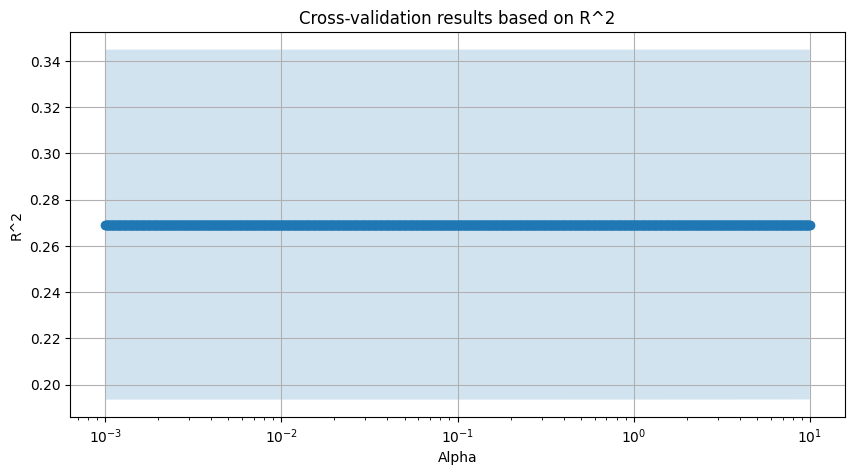

Ridge Regression: best_alpha = 10.0
RMSE =  27.987911784002087
MAE =  17.970378806868496
R_Squared =  -0.31738595257061775
+++++++++++++++++++++++++++++++++++++++++



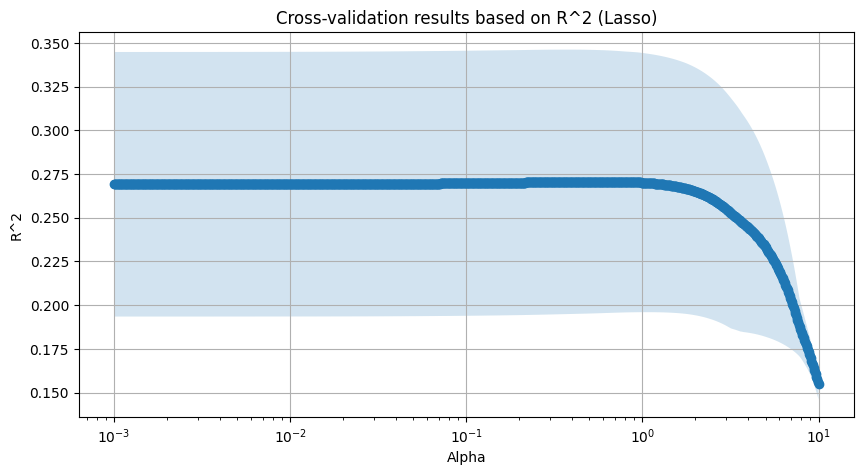

Lasso Regression: best_alpha = 0.5791122647641759
RMSE =  27.40714212173628
MAE =  17.429396925078365
R_Squared =  -0.26327976337945747
+++++++++++++++++++++++++++++++++++++++++



Lasso(alpha=0.5791122647641759)

In [ ]:
train_ridge(x_train, x_test, y_train, y_test)
train_lasso(x_train, x_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e+07, tolerance: 3.556e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+07, tolerance: 3.741e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

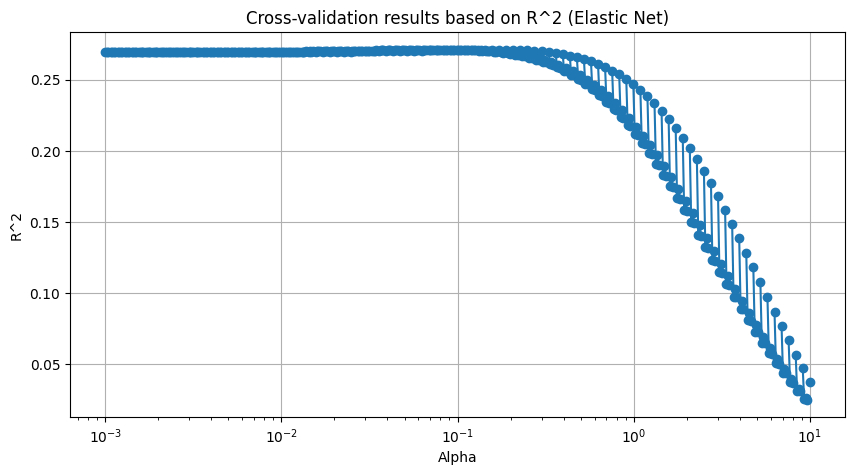

Elastic Net Regression: best_alpha = 0.15199110829529347 , best_l1_ratio = 0.5
RMSE =  26.930814180136597
MAE =  17.314231389810427
R_Squared =  -0.21975049239298516
+++++++++++++++++++++++++++++++++++++++++



ElasticNet(alpha=0.15199110829529347)

In [ ]:
train_elastic_net(x_train, x_test, y_train, y_test)

In [ ]:
#Kernel Regression
def train_svm(x_train, x_test, y_train, y_test):
    from sklearn.svm import SVR
    param_grid = {'C': np.logspace(-3, 3,7), 'gamma': np.logspace(-3, 3,7)}
    model = SVR()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(x_train, y_train)
    best_params = grid_search.best_params_
    best_model = SVR(C=best_params['C'], gamma=best_params['gamma'])
    best_model.fit(x_train, y_train)
    rmse, mae, r2 = perform_get(best_model, x_test, y_test)  # Assuming perform_get is defined elsewhere
    # Lưu lại kết quả cross-validation
    cv_results = grid_search.cv_results_
    Cs = np.logspace(-3, 3, 7)
    gammas = np.logspace(-3, 3, 7)
    mean_scores = np.array(cv_results['mean_test_score']).reshape(len(Cs), len(gammas))
    # Vẽ biểu đồ 3D của kết quả cross-validation dựa trên MAE
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(Cs, gammas)
    ax.plot_surface(np.log10(X), np.log10(Y), mean_scores, cmap='viridis', alpha=0.8)
    ax.set_xlabel('log10(C)')
    ax.set_ylabel('log10(gamma)')
    ax.set_zlabel('Negative MAE')
    ax.set_title('Cross-validation results for SVR')
    plt.show()
    print('SVM Regression')
    print('SVR: best_C =', best_params['C'], ', best_gamma =', best_params['gamma'])
    show(rmse, mae, r2)  # Assuming show is defined elsewhere
    return best_model

In [ ]:
train_svm(x_train, x_test, y_train, y_test)

In [ ]:
#Tree-Based Regression
def train_decision_tree(x_train, x_test, y_train, y_test, max_depth=None):
    from sklearn.tree import DecisionTreeRegressor
    param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}
    model = DecisionTreeRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=['neg_mean_absolute_error', 'r2'], refit='r2')
    grid_search.fit(x_train, y_train)
    best_max_depth = grid_search.best_params_['max_depth']
    best_model = DecisionTreeRegressor(max_depth=best_max_depth)
    best_model.fit(x_train, y_train)
    mae, rmse, r2 = perform_get(best_model, x_test, y_test)
    print('Decision Tree Regression:')
    print('Best max_depth:', best_max_depth)
    show(mae, rmse, r2)
    return best_model

def train_random_forest(x_train, x_test, y_train, y_test, n_estimators=100, max_depth=None):
    from sklearn.ensemble import RandomForestRegressor
    param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30, 40, 50]}
    model = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=['neg_mean_absolute_error', 'r2'], refit='r2')
    grid_search.fit(x_train, y_train)
    best_n_estimators = grid_search.best_params_['n_estimators']
    best_max_depth = grid_search.best_params_['max_depth']
    best_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth)
    best_model.fit(x_train, y_train)
    mae, rmse, r2 = perform_get(best_model, x_test, y_test)
    print('Random Forest Regression:')
    print('Best n_estimators:', best_n_estimators)
    print('Best max_depth:', best_max_depth)
    show(mae, rmse, r2)
    return best_model

def train_xgboost(x_train, x_test, y_train, y_test, max_depth=None, n_estimators=100):
    from xgboost import XGBRegressor
    param_grid = {
        'max_depth': [3, 6, 9],
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3]
    }
    model = XGBRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=['neg_mean_absolute_error', 'r2'], refit='r2')
    grid_search.fit(x_train, y_train)
    best_params = grid_search.best_params_
    best_model = XGBRegressor(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'])
    best_model.fit(x_train, y_train)
    mae, rmse, r2 = perform_get(best_model, x_test, y_test)
    print('XGBoost Regression:')
    print('Best max_depth:', best_params['max_depth'])
    print('Best n_estimators:', best_params['n_estimators'])
    print('Best learning_rate:', best_params['learning_rate'])
    show(mae, rmse, r2)
    return best_model

In [ ]:
train_decision_tree(x_train, x_test, y_train, y_test, max_depth=None)
train_random_forest(x_train, x_test, y_train, y_test, n_estimators=100, max_depth=None)
train_xgboost(x_train, x_test, y_train, y_test, max_depth=None, n_estimators=100)

In [ ]:
def train_catboost_regression(x_train, x_test, y_train, y_test):
    # Tạo mô hình CatBoost Regression
    from catboost import CatBoostRegressor
    model = CatBoostRegressor(verbose=0)
    # Tạo grid search cho các siêu tham số
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.3],  # Các giá trị learning_rate để kiểm tra
        'depth': [6, 8, 10]  # Các giá trị depth để kiểm tra
    }
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
    # Huấn luyện mô hình
    grid_search.fit(x_train, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = grid_search.predict(x_test)
    # Tính toán R^2
    r2 = grid_search.score(x_test, y_test)
    # Tính toán RMSE và MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # Vẽ biểu đồ dự đoán và thực tế
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.title('Actual vs Predicted (CatBoost Regression)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    # Hiển thị giá trị R^2, RMSE và MAE
    print('Catboost Regression')
    print("Best parameters:", grid_search.best_params_)
    print("R^2 score:", r2)
    print("RMSE:", rmse)
    print("MAE:", mae)
    # Trả về mô hình tốt nhất từ grid search
    return grid_search.best_estimator_

def train_lightgbm_regression(x_train, x_test, y_train, y_test):
    # Tạo mô hình LightGBM Regression
    import lightgbm as lgb
    model = lgb.LGBMRegressor()
    # Tạo grid search cho các siêu tham số
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.3],  # Các giá trị learning_rate để kiểm tra
        'max_depth': [6, 8, 10]  # Các giá trị max_depth để kiểm tra
    }
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
    # Huấn luyện mô hình
    grid_search.fit(x_train, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = grid_search.predict(x_test)
    # Tính toán R^2
    r2 = grid_search.score(x_test, y_test)
    # Tính toán RMSE và MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # Vẽ biểu đồ dự đoán và thực tế
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.title('Actual vs Predicted (LightGBM Regression)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    # Hiển thị giá trị R^2, RMSE và MAE
    print('Light GBM Regression')
    print("Best parameters:", grid_search.best_params_)
    print("R^2 score:", r2)
    print("RMSE:", rmse)
    print("MAE:", mae)
    # Trả về mô hình tốt nhất từ grid search
    return grid_search.best_estimator_

In [ ]:
train_lightgbm_regression(x_train, x_test, y_train, y_test)

In [ ]:
train_catboost_regression(x_train, x_test, y_train, y_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RANSACRegressor, HuberRegressor, TheilSenRegressor

def train_ransac_regression(x_train, x_test, y_train, y_test):
    # Tạo mô hình RANSAC Regression
    model = RANSACRegressor()
    # Tạo grid search cho các siêu tham số
    param_grid = {
        'min_samples': [0.1, 0.2, 0.3],  # Các giá trị min_samples để kiểm tra
        'max_trials': [50, 100, 150]  # Các giá trị max_trials để kiểm tra
    }
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
    # Huấn luyện mô hình
    grid_search.fit(x_train, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = grid_search.predict(x_test)
    # Tính toán R^2
    r2 = grid_search.score(x_test, y_test)
    # Tính toán RMSE và MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # Vẽ biểu đồ dự đoán và thực tế
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.title('Actual vs Predicted (RANSAC Regression)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    # Hiển thị giá trị R^2, RMSE và MAE
    print('RANSAC Regression')
    print("Best parameters:", grid_search.best_params_)
    print("R^2 score:", r2)
    print("RMSE:", rmse)
    print("MAE:", mae)
    # Trả về mô hình tốt nhất từ grid search
    return grid_search.best_estimator_

def train_huber_regression(x_train, x_test, y_train, y_test):
    # Tạo mô hình Huber Regression
    model = HuberRegressor()
    # Tạo grid search cho các siêu tham số
    param_grid = {
        'epsilon': [1.0, 1.5, 2.0],  # Các giá trị epsilon để kiểm tra
        'alpha': [0.0001, 0.001, 0.01]  # Các giá trị alpha để kiểm tra
    }
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
    # Huấn luyện mô hình
    grid_search.fit(x_train, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = grid_search.predict(x_test)
    # Tính toán R^2
    r2 = grid_search.score(x_test, y_test)
    # Tính toán RMSE và MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # Vẽ biểu đồ dự đoán và thực tế
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.title('Actual vs Predicted (Huber Regression)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    # Hiển thị giá trị R^2, RMSE và MAE
    print('Huber Regression')
    print("Best parameters:", grid_search.best_params_)
    print("R^2 score:", r2)
    print("RMSE:", rmse)
    print("MAE:", mae)
    # Trả về mô hình tốt nhất từ grid search
    return grid_search.best_estimator_

def train_theil_sen_regression(x_train, x_test, y_train, y_test):
    # Tạo mô hình Theil-Sen Regression
    model = TheilSenRegressor()
    # Không có các siêu tham số để tinh chỉnh trong Theil-Sen Regression
    # Huấn luyện mô hình
    model.fit(x_train, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(x_test)
    # Tính toán R^2
    r2 = model.score(x_test, y_test)
    # Tính toán RMSE và MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # Vẽ biểu đồ dự đoán và thực tế
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.title('Actual vs Predicted (Theil-Sen Regression)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    # Hiển thị giá trị R^2, RMSE và MAE
    print('Theil-Sen Regression')
    print("R^2 score:", r2)
    print("RMSE:", rmse)
    print("MAE:", mae)
    # Trả về mô hình Theil-Sen Regression
    return model

In [ ]:
train_ransac_regression(x_train, x_test, y_train, y_test)
train_huber_regression(x_train, x_test, y_train, y_test)
train_theil_sen_regression(x_train, x_test, y_train, y_test)

#Huấn luyện

In [ ]:
def train_models(x_train,x_test,y_train,y_test):
  print("LinearRegression")
  train_linear(x_train,x_test,y_train,y_test)

  print("Ridge")
  train_Ridge_Lasso(x_train, x_test, y_train, y_test, model_type='ridge', alpha=1.0)

  print("Lasso")
  train_Ridge_Lasso(x_train, x_test, y_train, y_test, model_type='lasso', alpha=1.0)

  print("SVM(SVR)")
  train_SVM(x_train, x_test, y_train, y_test, kernel='linear', C=1.0, epsilon=0.1)
  print("DecisionTree")
  for max_depth in range(1,6):
    print("độ sâu = ",max_depth)
    train_tree(x_train, x_test, y_train, y_test, model_type='decision_tree', max_depth=max_depth, n_estimators=100)
  print("RandomForest")
  for max_depth in range(1,6):
    print("độ sâu = ",max_depth)
    train_tree(x_train, x_test, y_train, y_test, model_type='random_forest', max_depth=max_depth, n_estimators=100)

  print("XGboost")
  train_xgb(x_train, x_test, y_train, y_test, max_depth=3, learning_rate=0.1, n_estimators=100)


In [ ]:
train_models(x_train,x_test,y_train,y_test)

LinearRegression
MSE =  778.5433416228562
RMSE =  27.902389532490872
MAE =  17.889571172129905
R_Squared =  -0.30934721941999843
MAPE =  2.0062783529092347
Cost time =  0.012195825576782227
+++++++++++++++++++++++++++++++++++++++++

Ridge
MSE =  778.4958648065854
RMSE =  27.90153875338393
MAE =  17.88908050497609
R_Squared =  -0.30926737333558973
MAPE =  2.006207593365061
Cost time =  0.008466720581054688
+++++++++++++++++++++++++++++++++++++++++

Lasso
MSE =  736.7058777690916
RMSE =  27.142326314615914
MAE =  17.208299789198712
R_Squared =  -0.2389853474009993
MAPE =  1.8277980649634038
Cost time =  0.006628513336181641
+++++++++++++++++++++++++++++++++++++++++

SVM(SVR)
MSE =  604.8462723423851
RMSE =  24.59362259494085
MAE =  13.47150174927109
R_Squared =  -0.017225043909878
MAPE =  1.4132397809394008
Cost time =  14.962247133255005
+++++++++++++++++++++++++++++++++++++++++

DecisionTree
độ sâu =  1
MSE =  1025.4967750512883
RMSE =  32.02337857021473
MAE =  20.27638596578947
R_Squa